In [2]:
#Imprting packages
import cv2
import mediapipe as mp
import numpy ap np
import pyttsx3
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose 

In [3]:
#Function which takes a text file as parameter and convert the text into audio,when the function is called.
engine = pyttsx3.init()
def text2speech(text_file):
    pose=text_file
    f=open(pose,'r')
    text=f.read()
    f.close()
    engine.setProperty('rate',150)
    engine.say(text)
    engine.runAndWait()

In [4]:
#Function to calculate angles between two bones which will be used further.
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [5]:
cap = cv2.VideoCapture(0)

#Creating lable variable
label="Unknown Pose"

# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        ##STEP I 
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
        # Extract landmarks 
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            right_shoulder= [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            
            # STEP II:Calculate angle between the joints
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            right_elbow_angle=calculate_angle(right_shoulder,right_elbow,right_wrist)
            left_shoulder_angle = calculate_angle(left_hip, left_shoulder, left_elbow)
            right_shoulder_angle = calculate_angle(right_hip, right_shoulder, right_elbow)
            left_hip_angle=calculate_angle(left_knee,left_hip,left_shoulder)
            right_hip_angle=calculate_angle(right_knee,right_hip,right_shoulder)
            left_knee_angle=calculate_angle(left_ankle,left_knee,left_hip)
            right_knee_angle=calculate_angle(right_ankle,right_knee,right_hip)
           
            #STEP III: Classifing poses
            #Check if hands are staright or not
            if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
                if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:
                    #Warrior II pose
                    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
                        if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:
                            label="warrior II Pose"
                            text2speech("Warrior_II.txt")
                    #T Pose
                    if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:
                        label = 'T Pose'    
                        text2speech("TPose.txt")
            #Tree Pose
            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195 :
                if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45 :
                    label = 'Tree Pose'
                    text2speech("treepose.txt")
                    
            else:
                label = 'Unknown Pose'
        
        except:
            pass
        
        #Showing label on the output screen
        cv2.putText(image, label,(10,60),cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,0), 1, cv2.LINE_AA)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius=2))
                
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [33]:
# import torch
# import torch.nn as nn
# import torch.optim as optim

# class PolicyNetwork(nn.Module):
#     def __init__(self):
#         super(PolicyNetwork, self).__init__()
#         self.fc1 = nn.Linear(16, 128) # 16 joint angles as input
#         self.fc2 = nn.Linear(128, 16) # 16 joint angles as output (representing the pose)

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.tanh(self.fc2(x)) # tanh is used for continuous action spaces
#         return x

# policy = PolicyNetwork()
# optimizer = optim.Adam(policy.parameters(), lr=0.01)


# def get_reward(current_pose, target_pose):
#     return -torch.sum(torch.abs(current_pose - target_pose))

# # Inside your main loop
# state = torch.tensor([left_elbow_angle, right_elbow_angle, left_shoulder_angle, 
#                       right_shoulder_angle, left_hip_angle, right_hip_angle, 
#                       left_knee_angle, right_knee_angle], requires_grad=True) # Add more angles as required

# action = policy(state)
# next_state = apply_action(state, action) # You need to define this function to simulate the pose change

# reward = get_reward(next_state, target_pose) # target_pose should be defined somewhere

# # Save the reward and log prob for REINFORCE
# rewards.append(reward)
# log_probs.append(torch.log(policy(state)))

# # After an episode ends
# returns = []
# R = 0
# for r in rewards[::-1]:
#     R = r + 0.99 * R
#     returns.insert(0, R)

# returns = torch.tensor(returns)
# returns = (returns - returns.mean()) / (returns.std() + 1e-9)

# for log_prob, R in zip(log_probs, returns):
#     policy_loss.append(-log_prob * R)

# optimizer.zero_grad()
# policy_loss.backward()
# optimizer.step()

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import cv2
import mediapipe as mp
import logging

# Set up the logger
logging.basicConfig(filename='log.txt', level=logging.INFO)

class PolicyNetwork(nn.Module):
    def __init__(self):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(16, 128) # 16 joint angles as input
        self.fc2 = nn.Linear(128, 16) # 16 joint angles as output (representing the pose)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.tanh(self.fc2(x)) # tanh is used for continuous action spaces
        return x

policy = PolicyNetwork()
optimizer = optim.Adam(policy.parameters(), lr=0.01)

def get_reward(current_pose, target_pose):
    return -torch.sum(torch.abs(current_pose - target_pose))

cap = cv2.VideoCapture(0)

# Creating label variable
label="Unknown Pose"

# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Extract landmarks 
        try:
            landmarks = results.pose_landmarks.landmark

            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
            right_shoulder= [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]
            
            # STEP II:Calculate angle between the joints
            left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
            right_elbow_angle=calculate_angle(right_shoulder,right_elbow,right_wrist)
            left_shoulder_angle = calculate_angle(left_hip, left_shoulder, left_elbow)
            right_shoulder_angle = calculate_angle(right_hip, right_shoulder, right_elbow)
            left_hip_angle=calculate_angle(left_knee,left_hip,left_shoulder)
            right_hip_angle=calculate_angle(right_knee,right_hip,right_shoulder)
            left_knee_angle=calculate_angle(left_ankle,left_knee,left_hip)
            right_knee_angle=calculate_angle(right_ankle,right_knee,right_hip) 

            #STEP III: Classifing poses
            #Check if hands are staright or not
            if left_elbow_angle > 165 and left_elbow_angle < 195 and right_elbow_angle > 165 and right_elbow_angle < 195:
                if left_shoulder_angle > 80 and left_shoulder_angle < 110 and right_shoulder_angle > 80 and right_shoulder_angle < 110:
                    #Warrior II pose
                    if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195:
                        if left_knee_angle > 90 and left_knee_angle < 120 or right_knee_angle > 90 and right_knee_angle < 120:
                            label="warrior II Pose"
                            text2speech("Warrior_II.txt")
                    #T Pose
                    if left_knee_angle > 160 and left_knee_angle < 195 and right_knee_angle > 160 and right_knee_angle < 195:
                        label = 'T Pose'    
                        text2speech("TPose.txt")
            #Tree Posey
            if left_knee_angle > 165 and left_knee_angle < 195 or right_knee_angle > 165 and right_knee_angle < 195 :
                if left_knee_angle > 315 and left_knee_angle < 335 or right_knee_angle > 25 and right_knee_angle < 45 :
                    label = 'Tree Pose'
                    text2speech("treepose.txt")
                    
            else:
                label = 'Unknown Pose'


            action = policy(state)
            next_state = apply_action(state, action) # You need to define this function to simulate the pose change

            reward = get_reward(next_state, target_pose) # target_pose should be defined somewhere

            # Save the reward and log prob for REINFORCE
            rewards.append(reward)
            log_probs.append(torch.log(policy(state)))

            # After an episode ends
            returns = []
            R = 0
            for r in rewards[::-1]:
                R = r + 0.99 * R
                returns.insert(0, R)

            returns = torch.tensor(returns)
            returns = (returns - returns.mean()) / (returns.std() + 1e-9)

            for log_prob, R in zip(log_probs, returns):
                policy_loss.append(-log_prob * R)
            
            # Log the reward and policy loss
            logging.info(f"Reward: {reward}")
            logging.info(f"Policy loss: {policy_loss}")

            optimizer.zero_grad()
            policy_loss.backward()
            optimizer.step()

        except:
            pass

        # Showing label on the output screen
        cv2.putText(image, label,(10,60),cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,0), 1, cv2.LINE_AA)
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(0,0,255), thickness=2, circle_radius=2),
                                  mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius=2))

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [27]:
def calculate_angle(a, b, c):
    a = np.array(a) 
    b = np.array(b) 
    c = np.array(c) 

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle

def get_joint_angles(landmarks):
    # Extract landmarks
    left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
    left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
    left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
    left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
    left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
    left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
    right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
    right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
    right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
    right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
    right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
    right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

    # Calculate angles
    left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
    right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
    left_shoulder_angle = calculate_angle(left_hip, left_shoulder, left_elbow)
    right_shoulder_angle = calculate_angle(right_hip, right_shoulder, right_elbow)
    left_hip_angle = calculate_angle(left_knee, left_hip, left_shoulder)
    right_hip_angle = calculate_angle(right_knee, right_hip, right_shoulder)
    left_knee_angle = calculate_angle(left_ankle, left_knee, left_hip)
    right_knee_angle = calculate_angle(right_ankle, right_knee, right_hip)

    joint_angles = [left_elbow_angle, right_elbow_angle, left_shoulder_angle, right_shoulder_angle, left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle]

    return joint_angles


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import cv2
import mediapipe as mp
import numpy as np

# Add MediaPipe Hands
mp_pose = mp.solutions.pose

# Define the Policy Network
class PolicyNetwork(nn.Module):
    def __init__(self):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(16, 128) # 16 joint angles as input
        self.fc2 = nn.Linear(128, 16) # 16 joint angles as output (representing the pose)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.tanh(self.fc2(x)) # tanh is used for continuous action spaces
        return x

# Initialize the policy and optimizer
policy = PolicyNetwork()
optimizer = optim.Adam(policy.parameters(), lr=0.01)

def apply_action(state, action):
    next_state = state + action
    return next_state

def get_reward(current_pose, target_pose):
    return -torch.sum(torch.abs(current_pose - target_pose))

target_pose = torch.tensor([90, 90, 0, 0, 0, 90, 90, 0, 0, 0, 90, 90, 0, 0, 0, 90])  # Example target pose

# Video capture
cap = cv2.VideoCapture(0)

# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get joint angles
            joint_angles = get_joint_angles(landmarks)
            state = torch.tensor(joint_angles)
            action = policy(state)
            next_state = apply_action(state, action)
            
            reward = get_reward(next_state, target_pose)
            print(f"Reward: {reward}")

            policy_loss = -reward
            print(f"Policy loss: {policy_loss}")

            optimizer.zero_grad()
            policy_loss.backward()
            optimizer.step()

        except:
            pass

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import cv2
import mediapipe as mp

# Define the Policy Network
class PolicyNetwork(nn.Module):
    def __init__(self):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(16, 128) # 16 joint angles as input
        self.fc2 = nn.Linear(128, 16) # 16 joint angles as output (representing the pose)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.tanh(self.fc2(x)) # tanh is used for continuous action spaces
        return x

# Initialize the policy and optimizer
policy = PolicyNetwork()
optimizer = optim.Adam(policy.parameters(), lr=0.01)

def apply_action(state, action):
    next_state = state + action
    return next_state

def get_reward(current_pose, target_pose):
    return -torch.sum(torch.abs(current_pose - target_pose))

target_pose = torch.tensor([90, 90, 0, 0, 0, 90, 90, 0, 0, 0, 90, 90, 0, 0, 0, 90])  # Example target pose

# Video capture
cap = cv2.VideoCapture(0)

# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make detection
        results = pose.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get joint angles
            joint_angles = get_joint_angles(landmarks)  # You need to define this function
            state = torch.tensor(joint_angles)
            action = policy(state)
            next_state = apply_action(state, action)
            
            reward = get_reward(next_state, target_pose)
            print(f"Reward: {reward}")

            policy_loss = -reward
            print(f"Policy loss: {policy_loss}")

            optimizer.zero_grad()
            policy_loss.backward()
            optimizer.step()

        except:
            pass

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [ ]:
# import cv2
# import mediapipe as mp
# import torch

# mp_drawing = mp.solutions.drawing_utils
# mp_pose = mp.solutions.pose

# # Define your policy network here
# class PolicyNetwork(nn.Module):
#     # Define the structure of your network here

#     def forward(self, x):
#         # Define the forward pass of your network here
#         return output

# # Initialize the policy and optimizer
# policy = PolicyNetwork()
# optimizer = torch.optim.Adam(policy.parameters(), lr=0.01)

# # Placeholder functions
# def apply_action(state, action):
#     return state + action

# def get_reward(state, target_pose):
#     return -torch.sum(torch.abs(state - target_pose))

# def calculate_angle(a, b, c):
#     a = torch.tensor(a) - torch.tensor(b)
#     b = torch.tensor(c) - torch.tensor(b)
    
#     cosine_angle = torch.dot(a, b) / (torch.norm(a) * torch.norm(b))
#     angle = torch.arccos(cosine_angle)
    
#     return angle

# def get_joint_angles(landmarks):
#     # Same as before

# # For the sake of demonstration, let's define a target_pose
# target_pose = torch.tensor([180, 315, 0, 0, 0, 0, 0, 0])  # Change this according to your use case

# # For webcam input:
# cap = cv2.VideoCapture(0)
# with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
#     while cap.isOpened():
#         success, image = cap.read()
#         if not success:
#             print("Ignoring empty camera frame.")
#             continue

#         # Same as before
        
#         try:
#             landmarks = results.pose_landmarks.landmark
            
#             # Get joint angles
#             joint_angles = get_joint_angles(landmarks)
#             current_pose = torch.tensor(joint_angles)  # current_pose is the same as state in this case

#             print(f"Current pose: {current_pose}")

#             # Get action from policy
#             action = policy(current_pose.float())

#             print(f"Action: {action}")

#             next_pose = apply_action(current_pose, action)

#             print(f"Next pose: {next_pose}")

#             reward = get_reward(next_pose, target_pose)

#             print(f"Reward: {reward}")
            
#             # Policy gradient step
#             optimizer.zero_grad()
#             loss = -reward  # we want to maximize reward, which is equivalent to minimizing negative reward
#             loss.backward()
#             optimizer.step()

#         except Exception as e:
#             print(f"Exception: {e}")

# cap.release()


Current pose: tensor([2.7968, 2.7891, 0.3397, 0.3304, 3.0016, 3.1033, 3.1409, 3.0871])
Action: tensor([2.7968, 2.7891, 0.3397, 0.3304, 3.0016, 3.1033, 3.1409, 3.0871])
Next pose: tensor([5.5936, 5.5783, 0.6795, 0.6608, 6.0031, 6.2065, 6.2818, 6.1742])
Reward: -19.102073669433594
Discounted Reward: -19.102073669433594
Current pose: tensor([2.7622, 2.7686, 0.3718, 0.3292, 2.9778, 3.1149, 3.1412, 3.0894])
Action: tensor([2.7622, 2.7686, 0.3718, 0.3292, 2.9778, 3.1149, 3.1412, 3.0894])
Next pose: tensor([5.5244, 5.5372, 0.7435, 0.6584, 5.9555, 6.2298, 6.2825, 6.1788])
Reward: -18.910991668701172
Discounted Reward: -18.721881866455078
Current pose: tensor([2.7566, 2.7528, 0.3794, 0.3190, 2.9763, 3.1140, 3.1399, 3.0881])
Action: tensor([2.7566, 2.7528, 0.3794, 0.3190, 2.9763, 3.1140, 3.1399, 3.0881])
Next pose: tensor([5.5133, 5.5056, 0.7589, 0.6381, 5.9525, 6.2280, 6.2799, 6.1763])
Reward: -18.86334800720215
Discounted Reward: -18.487966537475586
Current pose: tensor([2.7866, 2.7962, 0.4018

Current pose: tensor([0.3689, 1.1785, 0.5574, 0.4495, 3.0506, 2.9867, 2.7815, 2.7521])
Action: tensor([0.3689, 1.1785, 0.5574, 0.4495, 3.0506, 2.9867, 2.7815, 2.7521])
Next pose: tensor([0.7379, 2.3571, 1.1147, 0.8990, 6.1013, 5.9733, 5.5629, 5.5042])
Reward: -14.841346740722656
Discounted Reward: -11.314191818237305
Current pose: tensor([2.6556, 2.6076, 0.4503, 0.2753, 2.9994, 3.0404, 3.0578, 3.0544])
Action: tensor([2.6556, 2.6076, 0.4503, 0.2753, 2.9994, 3.0404, 3.0578, 3.0544])
Next pose: tensor([5.3112, 5.2151, 0.9006, 0.5506, 5.9987, 6.0809, 6.1155, 6.1088])
Reward: -17.98379135131836
Discounted Reward: -13.572714805603027
Current pose: tensor([2.8197, 2.7068, 0.3871, 0.2485, 2.9940, 3.0502, 3.1037, 3.1210])
Action: tensor([2.8197, 2.7068, 0.3871, 0.2485, 2.9940, 3.0502, 3.1037, 3.1210])
Next pose: tensor([5.6394, 5.4136, 0.7742, 0.4969, 5.9880, 6.1004, 6.2075, 6.2421])
Reward: -18.92440414428711
Discounted Reward: -14.139786720275879
Current pose: tensor([2.9667, 2.7709, 0.4164,

Current pose: tensor([2.7913, 3.0966, 0.3936, 0.2842, 3.0856, 2.9565, 3.1172, 3.0748])
Action: tensor([2.7913, 3.0966, 0.3936, 0.2842, 3.0856, 2.9565, 3.1172, 3.0748])
Next pose: tensor([5.5827, 6.1931, 0.7872, 0.5683, 6.1712, 5.9130, 6.2345, 6.1497])
Reward: -19.49334716796875
Discounted Reward: -11.103433609008789
Current pose: tensor([2.7621, 3.1013, 0.3988, 0.2988, 3.0762, 2.9579, 3.1165, 3.0758])
Action: tensor([2.7621, 3.1013, 0.3988, 0.2988, 3.0762, 2.9579, 3.1165, 3.0758])
Next pose: tensor([5.5242, 6.2026, 0.7976, 0.5975, 6.1525, 5.9157, 6.2330, 6.1516])
Reward: -19.38920783996582
Discounted Reward: -10.933674812316895
Current pose: tensor([2.7652, 3.0895, 0.3901, 0.3009, 3.0744, 2.9559, 3.1192, 3.0727])
Action: tensor([2.7652, 3.0895, 0.3901, 0.3009, 3.0744, 2.9559, 3.1192, 3.0727])
Next pose: tensor([5.5304, 6.1789, 0.7801, 0.6017, 6.1489, 5.9117, 6.2385, 6.1453])
Reward: -19.376617431640625
Discounted Reward: -10.817310333251953
Current pose: tensor([2.6903, 3.1074, 0.3706,

Current pose: tensor([2.9231, 2.8984, 0.3550, 0.2931, 3.0926, 2.9441, 3.1376, 3.0369])
Action: tensor([2.9231, 2.8984, 0.3550, 0.2931, 3.0926, 2.9441, 3.1376, 3.0369])
Next pose: tensor([5.8462, 5.7967, 0.7099, 0.5863, 6.1851, 5.8882, 6.2751, 6.0737])
Reward: -19.373661041259766
Discounted Reward: -8.412651062011719
Current pose: tensor([2.8170, 3.0011, 0.4295, 0.2718, 3.1045, 2.9546, 3.1288, 3.0490])
Action: tensor([2.8170, 3.0011, 0.4295, 0.2718, 3.1045, 2.9546, 3.1288, 3.0490])
Next pose: tensor([5.6339, 6.0022, 0.8589, 0.5435, 6.2090, 5.9092, 6.2576, 6.0981])
Reward: -19.312299728393555
Discounted Reward: -8.302145957946777
Current pose: tensor([2.7723, 3.0303, 0.4462, 0.2703, 3.1085, 2.9558, 3.1169, 3.0487])
Action: tensor([2.7723, 3.0303, 0.4462, 0.2703, 3.1085, 2.9558, 3.1169, 3.0487])
Next pose: tensor([5.5446, 6.0606, 0.8924, 0.5407, 6.2171, 5.9116, 6.2337, 6.0974])
Reward: -19.236637115478516
Discounted Reward: -8.186923027038574
Current pose: tensor([2.6735, 1.1404, 0.5697, 

Current pose: tensor([1.4496, 2.7777, 0.3453, 0.2741, 3.0565, 3.0492, 3.0836, 3.0597])
Action: tensor([1.4496, 2.7777, 0.3453, 0.2741, 3.0565, 3.0492, 3.0836, 3.0597])
Next pose: tensor([2.8993, 5.5553, 0.6907, 0.5482, 6.1130, 6.0983, 6.1672, 6.1195])
Reward: -16.79839324951172
Discounted Reward: -5.505215644836426
Current pose: tensor([1.7451, 2.7294, 0.3264, 0.2343, 3.0565, 3.0595, 3.0831, 3.0348])
Action: tensor([1.7451, 2.7294, 0.3264, 0.2343, 3.0565, 3.0595, 3.0831, 3.0348])
Next pose: tensor([3.4903, 5.4587, 0.6528, 0.4686, 6.1131, 6.1190, 6.1661, 6.0695])
Reward: -16.900007247924805
Discounted Reward: -5.483131408691406
Current pose: tensor([1.7833, 2.8614, 0.3105, 0.2258, 3.0535, 3.0572, 3.0865, 3.0601])
Action: tensor([1.7833, 2.8614, 0.3105, 0.2258, 3.0535, 3.0572, 3.0865, 3.0601])
Next pose: tensor([3.5666, 5.7229, 0.6209, 0.4516, 6.1071, 6.1145, 6.1730, 6.1203])
Reward: -17.336477279663086
Discounted Reward: -5.568495273590088
Current pose: tensor([2.3770, 2.9305, 0.3055, 0

Current pose: tensor([3.0704, 2.9565, 0.2129, 0.2968, 3.0167, 3.0636, 3.1107, 3.0536])
Action: tensor([3.0704, 2.9565, 0.2129, 0.2968, 3.0167, 3.0636, 3.1107, 3.0536])
Next pose: tensor([6.1409, 5.9131, 0.4258, 0.5937, 6.0334, 6.1271, 6.2213, 6.1072])
Reward: -20.12820053100586
Discounted Reward: -4.879410743713379
Current pose: tensor([3.0767, 2.9585, 0.2134, 0.2983, 3.0184, 3.0669, 3.1054, 3.0584])
Action: tensor([3.0767, 2.9585, 0.2134, 0.2983, 3.0184, 3.0669, 3.1054, 3.0584])
Next pose: tensor([6.1533, 5.9170, 0.4268, 0.5966, 6.0369, 6.1338, 6.2108, 6.1168])
Reward: -20.149944305419922
Discounted Reward: -4.835834980010986
Current pose: tensor([3.0695, 2.9550, 0.2174, 0.3044, 3.0255, 3.0660, 3.1260, 3.0746])
Action: tensor([3.0695, 2.9550, 0.2174, 0.3044, 3.0255, 3.0660, 3.1260, 3.0746])
Next pose: tensor([6.1390, 5.9101, 0.4348, 0.6089, 6.0510, 6.1320, 6.2520, 6.1492])
Reward: -20.194351196289062
Discounted Reward: -4.798027515411377
Current pose: tensor([3.0735, 2.9631, 0.2159, 0

Current pose: tensor([2.9942, 2.9455, 0.2546, 0.3240, 3.0380, 3.0262, 3.1202, 3.0986])
Action: tensor([2.9942, 2.9455, 0.2546, 0.3240, 3.0380, 3.0262, 3.1202, 3.0986])
Next pose: tensor([5.9884, 5.8910, 0.5093, 0.6480, 6.0760, 6.0525, 6.2403, 6.1972])
Reward: -19.89283561706543
Discounted Reward: -3.5670974254608154
Current pose: tensor([2.9969, 2.9514, 0.2520, 0.3157, 3.0371, 3.0261, 3.1178, 3.0973])
Action: tensor([2.9969, 2.9514, 0.2520, 0.3157, 3.0371, 3.0261, 3.1178, 3.0973])
Next pose: tensor([5.9937, 5.9029, 0.5039, 0.6315, 6.0743, 6.0522, 6.2356, 6.1946])
Reward: -19.92255401611328
Discounted Reward: -3.5367021560668945
Current pose: tensor([2.9866, 2.9297, 0.2624, 0.3183, 3.0312, 3.0361, 3.1272, 3.0917])
Action: tensor([2.9866, 2.9297, 0.2624, 0.3183, 3.0312, 3.0361, 3.1272, 3.0917])
Next pose: tensor([5.9732, 5.8595, 0.5247, 0.6367, 6.0623, 6.0722, 6.2544, 6.1833])
Reward: -19.848209381103516
Discounted Reward: -3.488269329071045
Current pose: tensor([2.9848, 2.9503, 0.2624, 

Current pose: tensor([3.0231, 2.9515, 0.4416, 0.5481, 3.0603, 2.9993, 3.1386, 3.1237])
Action: tensor([3.0231, 2.9515, 0.4416, 0.5481, 3.0603, 2.9993, 3.1386, 3.1237])
Next pose: tensor([6.0462, 5.9029, 0.8832, 1.0963, 6.1207, 5.9986, 6.2773, 6.2474])
Reward: -19.218341827392578
Discounted Reward: -2.549118757247925
Current pose: tensor([2.9553, 2.9206, 0.5113, 0.6093, 3.0640, 2.9961, 3.1369, 3.1251])
Action: tensor([2.9553, 2.9206, 0.5113, 0.6093, 3.0640, 2.9961, 3.1369, 3.1251])
Next pose: tensor([5.9106, 5.8411, 1.0226, 1.2187, 6.1280, 5.9921, 6.2739, 6.2503])
Reward: -18.759572982788086
Discounted Reward: -2.4633846282958984
Current pose: tensor([2.9675, 2.9061, 0.6292, 0.7289, 3.0661, 2.9923, 3.1333, 3.1275])
Action: tensor([2.9675, 2.9061, 0.6292, 0.7289, 3.0661, 2.9923, 3.1333, 3.1275])
Next pose: tensor([5.9350, 5.8121, 1.2585, 1.4579, 6.1321, 5.9845, 6.2667, 6.2551])
Reward: -18.27382469177246
Discounted Reward: -2.375603437423706
Current pose: tensor([2.9396, 2.8414, 0.7622, 

Current pose: tensor([3.0507, 3.0753, 1.6474, 1.6337, 3.0775, 3.0012, 3.1034, 3.1068])
Action: tensor([3.0507, 3.0753, 1.6474, 1.6337, 3.0775, 3.0012, 3.1034, 3.1068])
Next pose: tensor([6.1013, 6.1505, 3.2948, 3.2674, 6.1550, 6.0024, 6.2069, 6.2137])
Reward: -21.805580139160156
Discounted Reward: -2.139427661895752
Current pose: tensor([3.0664, 2.9934, 1.6589, 1.5936, 3.0763, 3.0016, 3.1046, 3.1164])
Action: tensor([3.0664, 2.9934, 1.6589, 1.5936, 3.0763, 3.0016, 3.1046, 3.1164])
Next pose: tensor([6.1328, 5.9868, 3.3178, 3.1872, 6.1525, 6.0033, 6.2091, 6.2328])
Reward: -21.6359920501709
Discounted Reward: -2.1015608310699463
Current pose: tensor([3.1173, 3.0742, 1.6734, 1.6474, 3.0744, 2.9995, 3.1052, 3.1246])
Action: tensor([3.1173, 3.0742, 1.6734, 1.6474, 3.0744, 2.9995, 3.1052, 3.1246])
Next pose: tensor([6.2347, 6.1483, 3.3467, 3.2947, 6.1489, 5.9989, 6.2105, 6.2491])
Reward: -22.04558753967285
Discounted Reward: -2.1199324131011963
Current pose: tensor([3.0574, 3.0342, 1.6404, 1

Current pose: tensor([3.0906, 2.8592, 1.6889, 1.8555, 3.1006, 2.9885, 3.0877, 3.1397])
Action: tensor([3.0906, 2.8592, 1.6889, 1.8555, 3.1006, 2.9885, 3.0877, 3.1397])
Next pose: tensor([6.1813, 5.7184, 3.3777, 3.7109, 6.2012, 5.9771, 6.1753, 6.2793])
Reward: -22.035018920898438
Discounted Reward: -1.5991867780685425
Current pose: tensor([3.1219, 3.0904, 1.7694, 1.7116, 3.0995, 2.9935, 3.0829, 3.1255])
Action: tensor([3.1219, 3.0904, 1.7694, 1.7116, 3.0995, 2.9935, 3.0829, 3.1255])
Next pose: tensor([6.2439, 6.1808, 3.5387, 3.4232, 6.1990, 5.9871, 6.1658, 6.2511])
Reward: -22.403099060058594
Discounted Reward: -1.609641194343567
Current pose: tensor([3.1409, 3.0966, 1.7423, 1.6825, 3.0944, 2.9914, 3.0907, 3.1315])
Action: tensor([3.1409, 3.0966, 1.7423, 1.6825, 3.0944, 2.9914, 3.0907, 3.1315])
Next pose: tensor([6.2818, 6.1931, 3.4847, 3.3650, 6.1888, 5.9828, 6.1813, 6.2630])
Reward: -22.354267120361328
Discounted Reward: -1.5900713205337524
Current pose: tensor([3.0365, 3.0542, 1.6945

Current pose: tensor([3.0686, 2.9238, 1.5499, 1.3633, 3.0500, 3.0257, 3.1117, 3.1033])
Action: tensor([3.0686, 2.9238, 1.5499, 1.3633, 3.0500, 3.0257, 3.1117, 3.1033])
Next pose: tensor([6.1372, 5.8476, 3.0998, 2.7266, 6.1001, 6.0513, 6.2234, 6.2066])
Reward: -20.806350708007812
Discounted Reward: -1.116959810256958
Current pose: tensor([3.0320, 2.9394, 1.5706, 1.4125, 3.0515, 3.0205, 3.1120, 3.1079])
Action: tensor([3.0320, 2.9394, 1.5706, 1.4125, 3.0515, 3.0205, 3.1120, 3.1079])
Next pose: tensor([6.0639, 5.8788, 3.1412, 2.8250, 6.1029, 6.0410, 6.2239, 6.2158])
Reward: -20.90621566772461
Discounted Reward: -1.1110976934432983
Current pose: tensor([3.0291, 2.9709, 1.5864, 1.4645, 3.0519, 3.0216, 3.1117, 3.1077])
Action: tensor([3.0291, 2.9709, 1.5864, 1.4645, 3.0519, 3.0216, 3.1117, 3.1077])
Next pose: tensor([6.0582, 5.9418, 3.1729, 2.9291, 6.1039, 6.0431, 6.2234, 6.2154])
Reward: -21.10154914855957
Discounted Reward: -1.1102643013000488
Current pose: tensor([3.1020, 3.0106, 1.6577, 

Current pose: tensor([3.0815, 2.9903, 1.6604, 1.6043, 3.0598, 3.0088, 3.1089, 3.1412])
Action: tensor([3.0815, 2.9903, 1.6604, 1.6043, 3.0598, 3.0088, 3.1089, 3.1412])
Next pose: tensor([6.1630, 5.9806, 3.3208, 3.2086, 6.1196, 6.0175, 6.2178, 6.2825])
Reward: -21.724111557006836
Discounted Reward: -0.8713733553886414
Current pose: tensor([3.0599, 3.0227, 1.6608, 1.6176, 3.0562, 3.0101, 3.1112, 3.1374])
Action: tensor([3.0599, 3.0227, 1.6608, 1.6176, 3.0562, 3.0101, 3.1112, 3.1374])
Next pose: tensor([6.1198, 6.0455, 3.3216, 3.2351, 6.1124, 6.0201, 6.2223, 6.2747])
Reward: -21.765275955200195
Discounted Reward: -0.8642943501472473
Current pose: tensor([3.0591, 3.0325, 1.6589, 1.6197, 3.0555, 3.0127, 3.1112, 3.1378])
Action: tensor([3.0591, 3.0325, 1.6589, 1.6197, 3.0555, 3.0127, 3.1112, 3.1378])
Next pose: tensor([6.1183, 6.0649, 3.3177, 3.2394, 6.1109, 6.0254, 6.2224, 6.2756])
Reward: -21.78836441040039
Discounted Reward: -0.8565589785575867
Current pose: tensor([3.0323, 3.0196, 1.6373

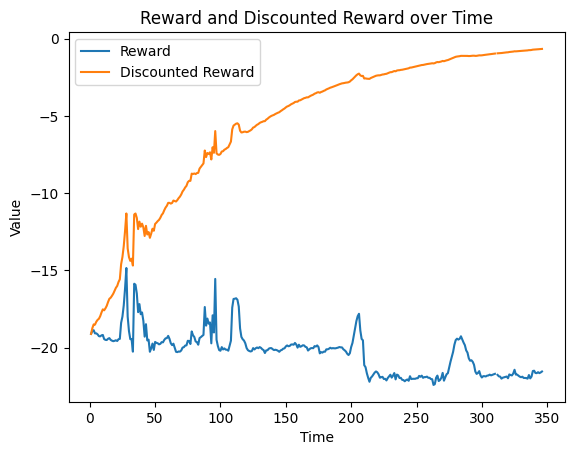

In [3]:
import cv2
import mediapipe as mp
import torch
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Placeholder functions
def policy(state):
    return state

def apply_action(state, action):
    return state + action

def get_reward(state, target_pose):
    return -torch.sum(torch.abs(state - target_pose))

def calculate_angle(a, b, c):
    a = torch.tensor(a) - torch.tensor(b)
    b = torch.tensor(c) - torch.tensor(b)
    
    cosine_angle = torch.dot(a, b) / (torch.norm(a) * torch.norm(b))
    angle = torch.arccos(cosine_angle)
    
    return angle


discount_factor = 0.99

def get_discounted_reward(state, target_pose, t):
    # Calculate the reward as the negative distance to the target
    distance = torch.sum(torch.abs(state - target_pose))
    
    # Apply the discount factor
    discounted_reward = -(discount_factor ** t) * distance
    return discounted_reward


def get_joint_angles(landmarks):
    # Extract landmarks
    left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
    left_elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
    left_wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
    left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
    left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
    left_ankle = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
    right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
    right_elbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
    right_wrist = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
    right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
    right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
    right_ankle = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]

    # Calculate angles
    left_elbow_angle = calculate_angle(left_shoulder, left_elbow, left_wrist)
    right_elbow_angle = calculate_angle(right_shoulder, right_elbow, right_wrist)
    left_shoulder_angle = calculate_angle(left_hip, left_shoulder, left_elbow)
    right_shoulder_angle = calculate_angle(right_hip, right_shoulder, right_elbow)
    left_hip_angle = calculate_angle(left_knee, left_hip, left_shoulder)
    right_hip_angle = calculate_angle(right_knee, right_hip, right_shoulder)
    left_knee_angle = calculate_angle(left_ankle, left_knee, left_hip)
    right_knee_angle = calculate_angle(right_ankle, right_knee, right_hip)

    joint_angles = [left_elbow_angle, right_elbow_angle, left_shoulder_angle, right_shoulder_angle, left_hip_angle, right_hip_angle, left_knee_angle, right_knee_angle]

    return joint_angles  # Return a list of joint angles. Add all joint angles you're interested in

# For the sake of demonstration, let's define a target_pose
target_pose = torch.tensor([3.1393, 2.9625, 1.6294, 1.4661, 3.0787, 3.0327, 3.1403, 3.1373])  # Change this according to your use case
t = 0  # Initialize time step

reward_list = []  # List to store rewards
disc_reward_list = []  # List to store discounted rewards
time = []  # List to store time steps

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
            continue

        # Flip the image horizontally for a later selfie-view display, and convert the BGR image to RGB.
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
        # To improve performance, optionally mark the image as not writeable to pass by reference.
        image.flags.writeable = False
        results = pose.process(image)

        # Draw the pose annotation on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # Show the image
        cv2.imshow('MediaPipe Pose', image)

        if cv2.waitKey(5) & 0xFF == 27:
            break

        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get joint angles
            joint_angles = get_joint_angles(landmarks)
            current_pose = torch.tensor(joint_angles)  # current_pose is the same as state in this case

            print(f"Current pose: {current_pose}")

            action = policy(current_pose)

            print(f"Action: {action}")

            next_pose = apply_action(current_pose, action)

            print(f"Next pose: {next_pose}")

            reward = get_reward(next_pose, target_pose)
            print(f"Reward: {reward}")
                       
            discounted_reward = get_discounted_reward(next_pose, target_pose, t)

            print(f"Discounted Reward: {discounted_reward}")

            # Increment the time step
            t += 1
            reward_list.append(reward)
            disc_reward_list.append(discounted_reward)
            time.append(t)
        

        except Exception as e:
            print(f"Exception: {e}")

cap.release()
# Plotting
plt.plot(time, reward_list, label='Reward')
plt.plot(time, disc_reward_list, label='Discounted Reward')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Reward and Discounted Reward over Time')

# Add legend
plt.legend()

# Display the plot
plt.show()
